🧾**Description:** Income inequality - when income is distributed in an uneven manner among a population - is a growing problem in developing nations across the world. With the rapid rise of AI and worker automation, this problem could continue to grow if steps are not taken to address the issue. This solution can potentially reduce the cost and improve the accuracy of monitoring key population indicators such as income level in between census years. This information will help policymakers to better manage and avoid income inequality globally.

🧭 **Problem Statement:** The target feature is **income_above_limit** which is a binary-class variable. The objective of this challenge is to create a machine learning model to predict whether an individual earns above or below a certain amount. Your metric for evaluation will be **f1-score**

<div class="alert alert-block alert-info">
<b>Importing Libraries</b></div>

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from itertools import product
import numpy as np
import scipy.stats as ss
from scipy.stats import pearsonr
from matplotlib.patches import Patch
from matplotlib.lines import Line2D


from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score,f1_score
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-info">
<b>Uploading dataset to Pandas</b></div>

In [2]:
dfIncome = pd.read_csv(r"InequalityPredictionDataset.csv")

In [3]:
dfIncome.head()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit


In [4]:
dfIncome.tail()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
209494,ID_TZ99995,16,Female,7th and 8th grade,NaN,High school,Never married,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,2170.60,Below limit
209495,ID_TZ99996,78,Male,Bachelors degree(BA AB BS),NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,Canada,?,?,?,?,NaN,NaN,NaN,1029.57,Below limit
209496,ID_TZ99997,8,Female,Children,NaN,NaN,Never married,White,All other,Children or Armed Forces,...,US,?,?,?,?,NaN,NaN,NaN,791.61,Below limit
209497,ID_TZ99998,26,Female,Some college but no degree,Private,NaN,Married-civilian spouse present,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,3530.26,Below limit
209498,ID_TZ99999,19,Male,11th grade,Local government,High school,Never married,Black,All other,Children or Armed Forces,...,US,MSA to MSA,Same,Same county,Same county,No,South,Florida,1987.72,Below limit


In [5]:
dfIncome.shape

(209499, 43)

<div class="alert alert-block alert-info">
<b>There are 2 million instances and 43 features</b></div>

In [6]:
dfIncome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

In [7]:
dfIncome.describe()

,age,employment_stat,wage_per_hour,working_week_per_year,industry_code,occupation_code,total_employed,vet_benefit,gains,losses,stocks_status,mig_year,importance_of_record
count,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000
mean,34.518728,0.176760,55.433487,23.158850,15.332398,11.321734,1.956067,1.515854,435.926887,36.881737,194.533420,94.499745,1740.888324
std,22.306738,0.555562,276.757327,24.397963,18.049655,14.460839,2.365154,0.850853,4696.359500,270.383302,1956.375501,0.500001,995.559557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,37.870000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,94.000000,1061.290000
50%,33.000000,0.000000,0.000000,8.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,94.000000,1617.040000
75%,50.000000,0.000000,0.000000,52.000000,33.000000,26.000000,4.000000,2.000000,0.000000,0.000000,0.000000,95.000000,2185.480000
max,90.000000,2.000000,9999.000000,52.000000,51.000000,46.000000,6.000000,2.000000,99999.000000,4608.000000,99999.000000,95.000000,18656.300000


In [8]:
dfIncome.describe(include='O').T

,count,unique,top,freq
ID,209499,209499,ID_TZ0000,1
gender,209499,2,Female,108784
education,209499,17,High school graduate,50627
class,104254,8,Private,75617
education_institute,13302,2,High school,7247
marital_status,209499,7,Never married,90723
race,209499,5,White,175709
is_hispanic,209499,10,All other,180404
employment_commitment,209499,8,Children or Armed Forces,129789
unemployment_reason,6520,5,Other job loser,2242


In [9]:
dfIncome.isna().sum()

ID                                     0
age                                    0
gender                                 0
education                              0
class                             105245
education_institute               196197
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
unemployment_reason               202979
employment_stat                        0
wage_per_hour                          0
is_labor_union                    189420
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                   151654
veterans_admin_questionnaire      207415
vet_benefit     

In [10]:
dfIncome.duplicated().sum()

0

In [11]:
print("Unique values per column:")
dfIncome.nunique()

Unique values per column:


ID                                209499
age                                   91
gender                                 2
education                             17
class                                  8
education_institute                    2
marital_status                         7
race                                   5
is_hispanic                           10
employment_commitment                  8
unemployment_reason                    5
employment_stat                        3
wage_per_hour                       1232
is_labor_union                         2
working_week_per_year                 53
industry_code                         52
industry_code_main                    24
occupation_code                       47
occupation_code_main                  14
total_employed                         7
household_stat                        38
household_summary                      8
under_18_family                        4
veterans_admin_questionnaire           2
vet_benefit     

In [12]:
for i in dfIncome.columns:
    if dfIncome[i].dtypes == 'object':
        print(f"Unique value in {i}:")
        print(dfIncome[i].unique(),'\n')

Unique value in ID:
['ID_TZ0000' 'ID_TZ0001' 'ID_TZ0002' ... 'ID_TZ99997' 'ID_TZ99998'
 'ID_TZ99999'] 

Unique value in gender:
[' Female' ' Male'] 

Unique value in education:
[' High school graduate' ' 12th grade no diploma' ' Children'
 ' Bachelors degree(BA AB BS)' ' 7th and 8th grade' ' 11th grade'
 ' 9th grade' ' Masters degree(MA MS MEng MEd MSW MBA)' ' 10th grade'
 ' Associates degree-academic program' ' 1st 2nd 3rd or 4th grade'
 ' Some college but no degree' ' Less than 1st grade'
 ' Associates degree-occup /vocational'
 ' Prof school degree (MD DDS DVM LLB JD)' ' 5th or 6th grade'
 ' Doctorate degree(PhD EdD)'] 

Unique value in class:
[nan ' Federal government' ' Private' ' Local government'
 ' Self-employed-incorporated' ' Self-employed-not incorporated'
 ' State government' ' Without pay' ' Never worked'] 

Unique value in education_institute:
[nan ' High school' ' College or university'] 

Unique value in marital_status:
[' Widowed' ' Never married' ' Married-civilian sp

In [13]:
dfIncome.replace(' ',np.nan,inplace=True)

In [14]:
dfIncome.replace(' ?',np.nan,inplace=True)

In [15]:
# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 
# One of the best notebooks on getting started with a ML problem.

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Percentage of missing values in income_above_limit : Below limit 
        mis_val_percent_below_limit = 100 * dfIncome[dfIncome['income_above_limit'] == 'Below limit'].isnull().sum() / len(df)
        
        # Percentage of missing values in income_above_limit : Above limit
        mis_val_percent_above_limit = 100 * dfIncome[dfIncome['income_above_limit'] == 'Above limit'].isnull().sum() /len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent,mis_val_percent_below_limit,mis_val_percent_above_limit], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values',2:'% of Total Values in Below limit',
                   3:'% of Total Values in Above limit'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [16]:
dfIncome_missing= missing_values_table(dfIncome)
dfIncome_missing

Your selected dataframe has 43 columns.
There are 17 columns that have missing values.


,Missing Values,% of Total Values,% of Total Values in Below limit,% of Total Values in Above limit
veterans_admin_questionnaire,207415,99.0,92.9,6.1
unemployment_reason,202979,96.9,90.8,6.1
education_institute,196197,93.7,87.5,6.2
old_residence_state,193889,92.5,86.6,5.9
old_residence_reg,193148,92.2,86.3,5.9
migration_prev_sunbelt,193148,92.2,86.3,5.9
is_labor_union,189420,90.4,85.3,5.1
under_18_family,151654,72.4,66.2,6.2
migration_code_change_in_reg,106284,50.7,47.4,3.3
residence_1_year_ago,106284,50.7,47.4,3.3


In [17]:
dfIncome.drop(['ID', 'veterans_admin_questionnaire','unemployment_reason','education_institute',
               'old_residence_reg','old_residence_state','is_labor_union','migration_prev_sunbelt'
              ,'migration_code_change_in_msa','migration_code_move_within_reg',
              'migration_code_change_in_reg','under_18_family','residence_1_year_ago'], axis=1,inplace=True)

In [18]:
dfIncome_missing

,Missing Values,% of Total Values,% of Total Values in Below limit,% of Total Values in Above limit
veterans_admin_questionnaire,207415,99.0,92.9,6.1
unemployment_reason,202979,96.9,90.8,6.1
education_institute,196197,93.7,87.5,6.2
old_residence_state,193889,92.5,86.6,5.9
old_residence_reg,193148,92.2,86.3,5.9
migration_prev_sunbelt,193148,92.2,86.3,5.9
is_labor_union,189420,90.4,85.3,5.1
under_18_family,151654,72.4,66.2,6.2
migration_code_change_in_reg,106284,50.7,47.4,3.3
residence_1_year_ago,106284,50.7,47.4,3.3


In [19]:
dfIncome.isna().sum()

age                             0
gender                          0
education                       0
class                      105245
marital_status                  0
race                            0
is_hispanic                     0
employment_commitment           0
employment_stat                 0
wage_per_hour                   0
working_week_per_year           0
industry_code                   0
industry_code_main              0
occupation_code                 0
occupation_code_main       105694
total_employed                  0
household_stat                  0
household_summary               0
vet_benefit                     0
tax_status                      0
gains                           0
losses                          0
stocks_status                   0
citizenship                     0
mig_year                        0
country_of_birth_own         3667
country_of_birth_father      7181
country_of_birth_mother      6516
importance_of_record            0
income_above_l

In [20]:
dfIncome["class"].unique()

array([nan, ' Federal government', ' Private', ' Local government',
       ' Self-employed-incorporated', ' Self-employed-not incorporated',
       ' State government', ' Without pay', ' Never worked'], dtype=object)

In [21]:
dfIncome[dfIncome["class"].isnull()].head(15)

,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,...,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,importance_of_record,income_above_limit
0,79,Female,High school graduate,NaN,Widowed,White,All other,Not in labor force,0,0,...,0,0,292,Native,95,US,US,US,1779.74,Below limit
1,65,Female,High school graduate,NaN,Widowed,White,All other,Children or Armed Forces,0,0,...,0,0,0,Native,94,US,US,US,2366.75,Below limit
3,2,Female,Children,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,0,0,...,0,0,0,Native,94,US,India,India,1380.27,Below limit
4,70,Male,High school graduate,NaN,Married-civilian spouse present,White,All other,Not in labor force,0,0,...,0,0,0,Native,95,US,US,US,1580.79,Below limit
8,73,Female,7th and 8th grade,NaN,Married-civilian spouse present,Black,All other,Not in labor force,0,0,...,0,0,0,Native,95,US,US,US,1267.30,Below limit
11,4,Male,Children,NaN,Never married,Black,All other,Children or Armed Forces,0,0,...,0,0,0,Native,94,US,US,US,1944.73,Below limit
12,21,Female,High school graduate,NaN,Never married,White,All other,Not in labor force,0,0,...,0,0,0,Native,95,US,US,US,1286.84,Below limit
13,16,Female,9th grade,NaN,Never married,White,All other,Children or Armed Forces,0,0,...,0,0,0,Native,94,US,US,US,2684.64,Below limit
15,36,Female,High school graduate,NaN,Married-civilian spouse present,White,Mexican-American,Children or Armed Forces,0,0,...,0,0,0,Native,94,US,US,US,1705.38,Below limit
16,5,Female,Children,NaN,Never married,White,All other,Children or Armed Forces,0,0,...,0,0,0,Native,95,US,US,US,1340.44,Below limit


In [22]:
dfIncome['income_above_limit'].value_counts()

Below limit    196501
Above limit     12998
Name: income_above_limit, dtype: int64

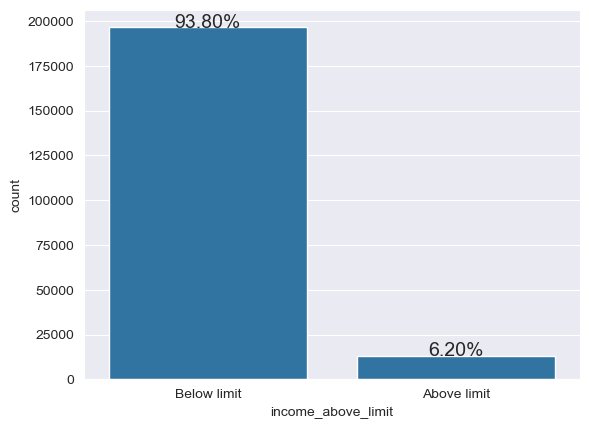

In [23]:
s = sns.countplot(x = 'income_above_limit',data = dfIncome)
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(dfIncome)*100),
            ha="center", fontsize=14) 

In [24]:
missing_values_table(dfIncome)

Your selected dataframe has 30 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values,% of Total Values in Below limit,% of Total Values in Above limit
occupation_code_main,105694,50.5,50.0,0.4
class,105245,50.2,49.8,0.4
country_of_birth_father,7181,3.4,3.1,0.3
country_of_birth_mother,6516,3.1,2.9,0.2
country_of_birth_own,3667,1.8,1.6,0.1


In [25]:
dfIncome.drop(['occupation_code_main','class'], axis=1,inplace=True)

In [26]:
missing_values_table(dfIncome)

Your selected dataframe has 28 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values,% of Total Values in Below limit,% of Total Values in Above limit
country_of_birth_father,7181,3.4,3.1,0.3
country_of_birth_mother,6516,3.1,2.9,0.2
country_of_birth_own,3667,1.8,1.6,0.1


In [27]:
## Replacing null values with frequent
impute_cols = [x for x in dfIncome.isna().sum()[dfIncome.isna().sum() != 0].index.tolist()]
for feat in impute_cols:
    mode = dfIncome[feat].mode()[0]
    dfIncome[feat].fillna(mode, inplace=True)

In [28]:
missing_values_table(dfIncome)

Your selected dataframe has 28 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,% of Total Values in Below limit,% of Total Values in Above limit


In [29]:
def corr_full(df, numeric_only=True, rows=['corr', 'p-value', 'obs']):
    """
    Generates a correlation matrix with correlation coefficients, 
    p-values, and observation count.
    
    Args:
    - df:                  Input dataframe
    - numeric_only (bool): Whether to consider only numeric columns for 
                           correlation. Default is True.
    - rows:                Determines the information to show. 
                           Default is ['corr', 'p-value', 'obs'].
    
    Returns:
    - formatted_table: The correlation matrix with the specified rows.
    """
    
    # Calculate Pearson correlation coefficients
    corr_matrix = df.corr()
    
    # Calculate the p-values using scipy's pearsonr
    pvalue_matrix = df.corr(method=lambda x, y: pearsonr(x, y)[1])
    
    # Calculate the non-null observation count for each column
    obs_count = df.apply(lambda x: x.notnull().sum())
    
    # Calculate observation count for each pair of columns
    obs_matrix = pd.DataFrame(
        index=corr_matrix.columns, columns=corr_matrix.columns)
    for col1 in obs_count.index:
        for col2 in obs_count.index:
            obs_matrix.loc[col1, col2] = min(obs_count[col1], obs_count[col2])
        
    # Create a multi-index dataframe to store the formatted correlations
    formatted_table = pd.DataFrame(
        index=pd.MultiIndex.from_product([corr_matrix.columns, rows]), 
        columns=corr_matrix.columns
    )
    
    # Assign values to the appropriate cells in the formatted table
    for col1 in corr_matrix.columns:
        for col2 in corr_matrix.columns:
            if 'corr' in rows:
                formatted_table.loc[
                    (col1, 'corr'), col2] = corr_matrix.loc[col1, col2]
            
            if 'p-value' in rows:
                # Avoid p-values for diagonal they correlate perfectly
                if col1 != col2:
                    formatted_table.loc[
                        (col1, 'p-value'), col2] = f"({pvalue_matrix.loc[col1, col2]:.4f})"
            if 'obs' in rows:
                formatted_table.loc[
                    (col1, 'obs'), col2] = obs_matrix.loc[col1, col2]
    
    return(formatted_table.fillna('')
           .style.set_properties(**{'text-align': 'center'}))

In [30]:
list(dfIncome)

['age',
 'gender',
 'education',
 'marital_status',
 'race',
 'is_hispanic',
 'employment_commitment',
 'employment_stat',
 'wage_per_hour',
 'working_week_per_year',
 'industry_code',
 'industry_code_main',
 'occupation_code',
 'total_employed',
 'household_stat',
 'household_summary',
 'vet_benefit',
 'tax_status',
 'gains',
 'losses',
 'stocks_status',
 'citizenship',
 'mig_year',
 'country_of_birth_own',
 'country_of_birth_father',
 'country_of_birth_mother',
 'importance_of_record',
 'income_above_limit']

In [31]:
dfIncome.dtypes

age                          int64
gender                      object
education                   object
marital_status              object
race                        object
is_hispanic                 object
employment_commitment       object
employment_stat              int64
wage_per_hour                int64
working_week_per_year        int64
industry_code                int64
industry_code_main          object
occupation_code              int64
total_employed               int64
household_stat              object
household_summary           object
vet_benefit                  int64
tax_status                  object
gains                        int64
losses                       int64
stocks_status                int64
citizenship                 object
mig_year                     int64
country_of_birth_own        object
country_of_birth_father     object
country_of_birth_mother     object
importance_of_record       float64
income_above_limit          object
dtype: object

In [32]:
# Identify numerical columns
numerical_columns = dfIncome.select_dtypes(include=[np.number]).columns

# Identify categorical columns
categorical_columns = dfIncome.select_dtypes(include='object').columns

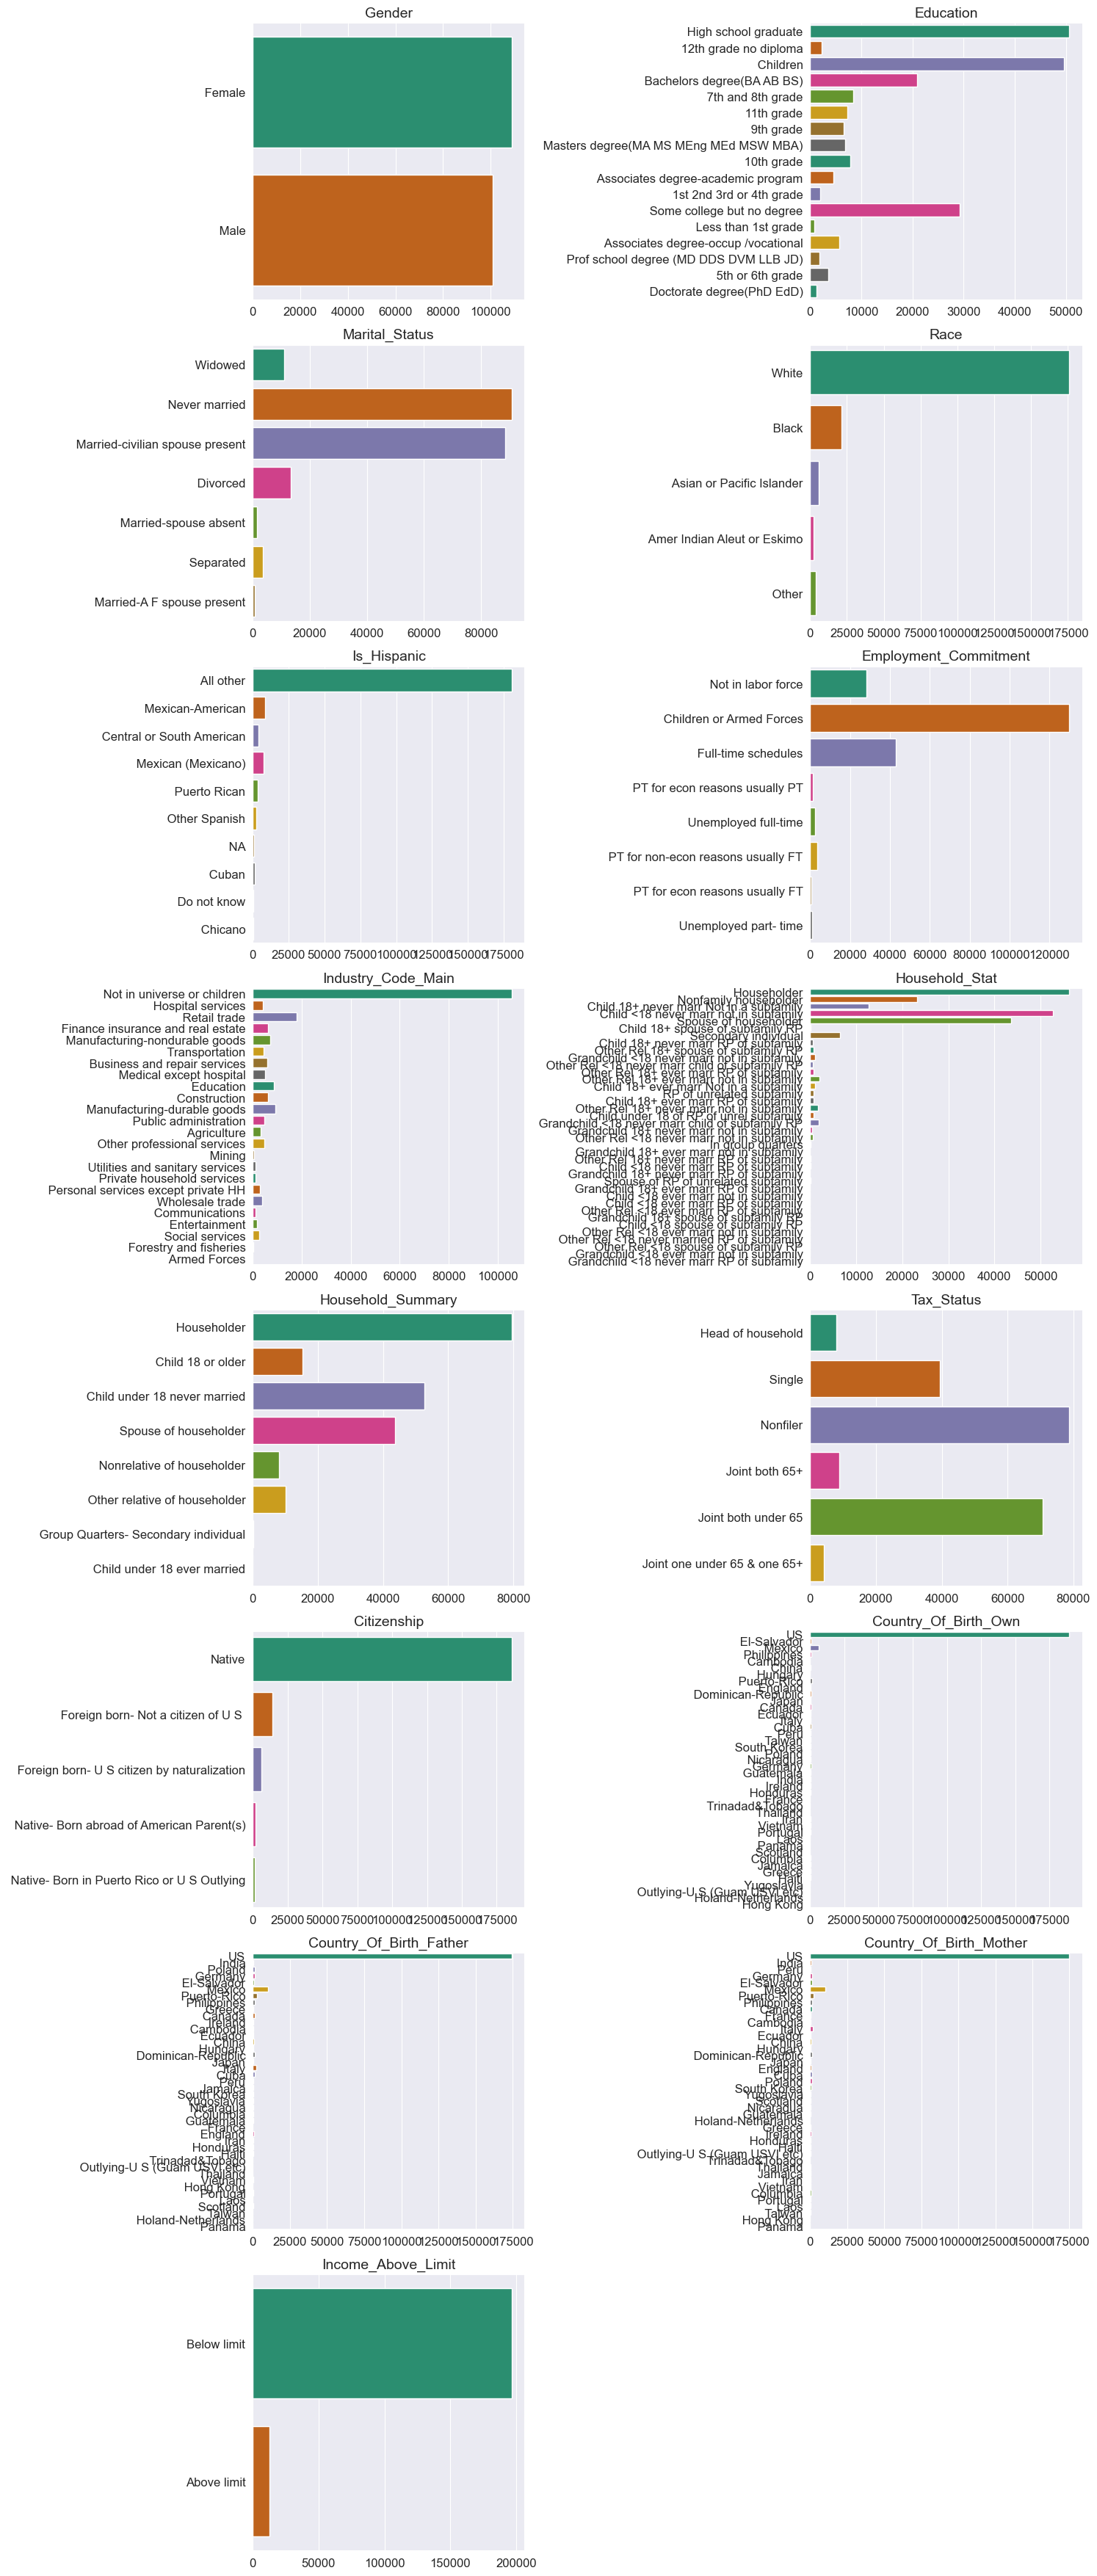

In [33]:
plt.figure(figsize=(15,70))
plotnumber = 1

for col in dfIncome[categorical_columns]:
    if plotnumber <= dfIncome.shape[1]:
        ax1 = plt.subplot(16,2,plotnumber)
        sns.countplot(data=dfIncome, y=col, palette='Dark2')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1
plt.tight_layout()

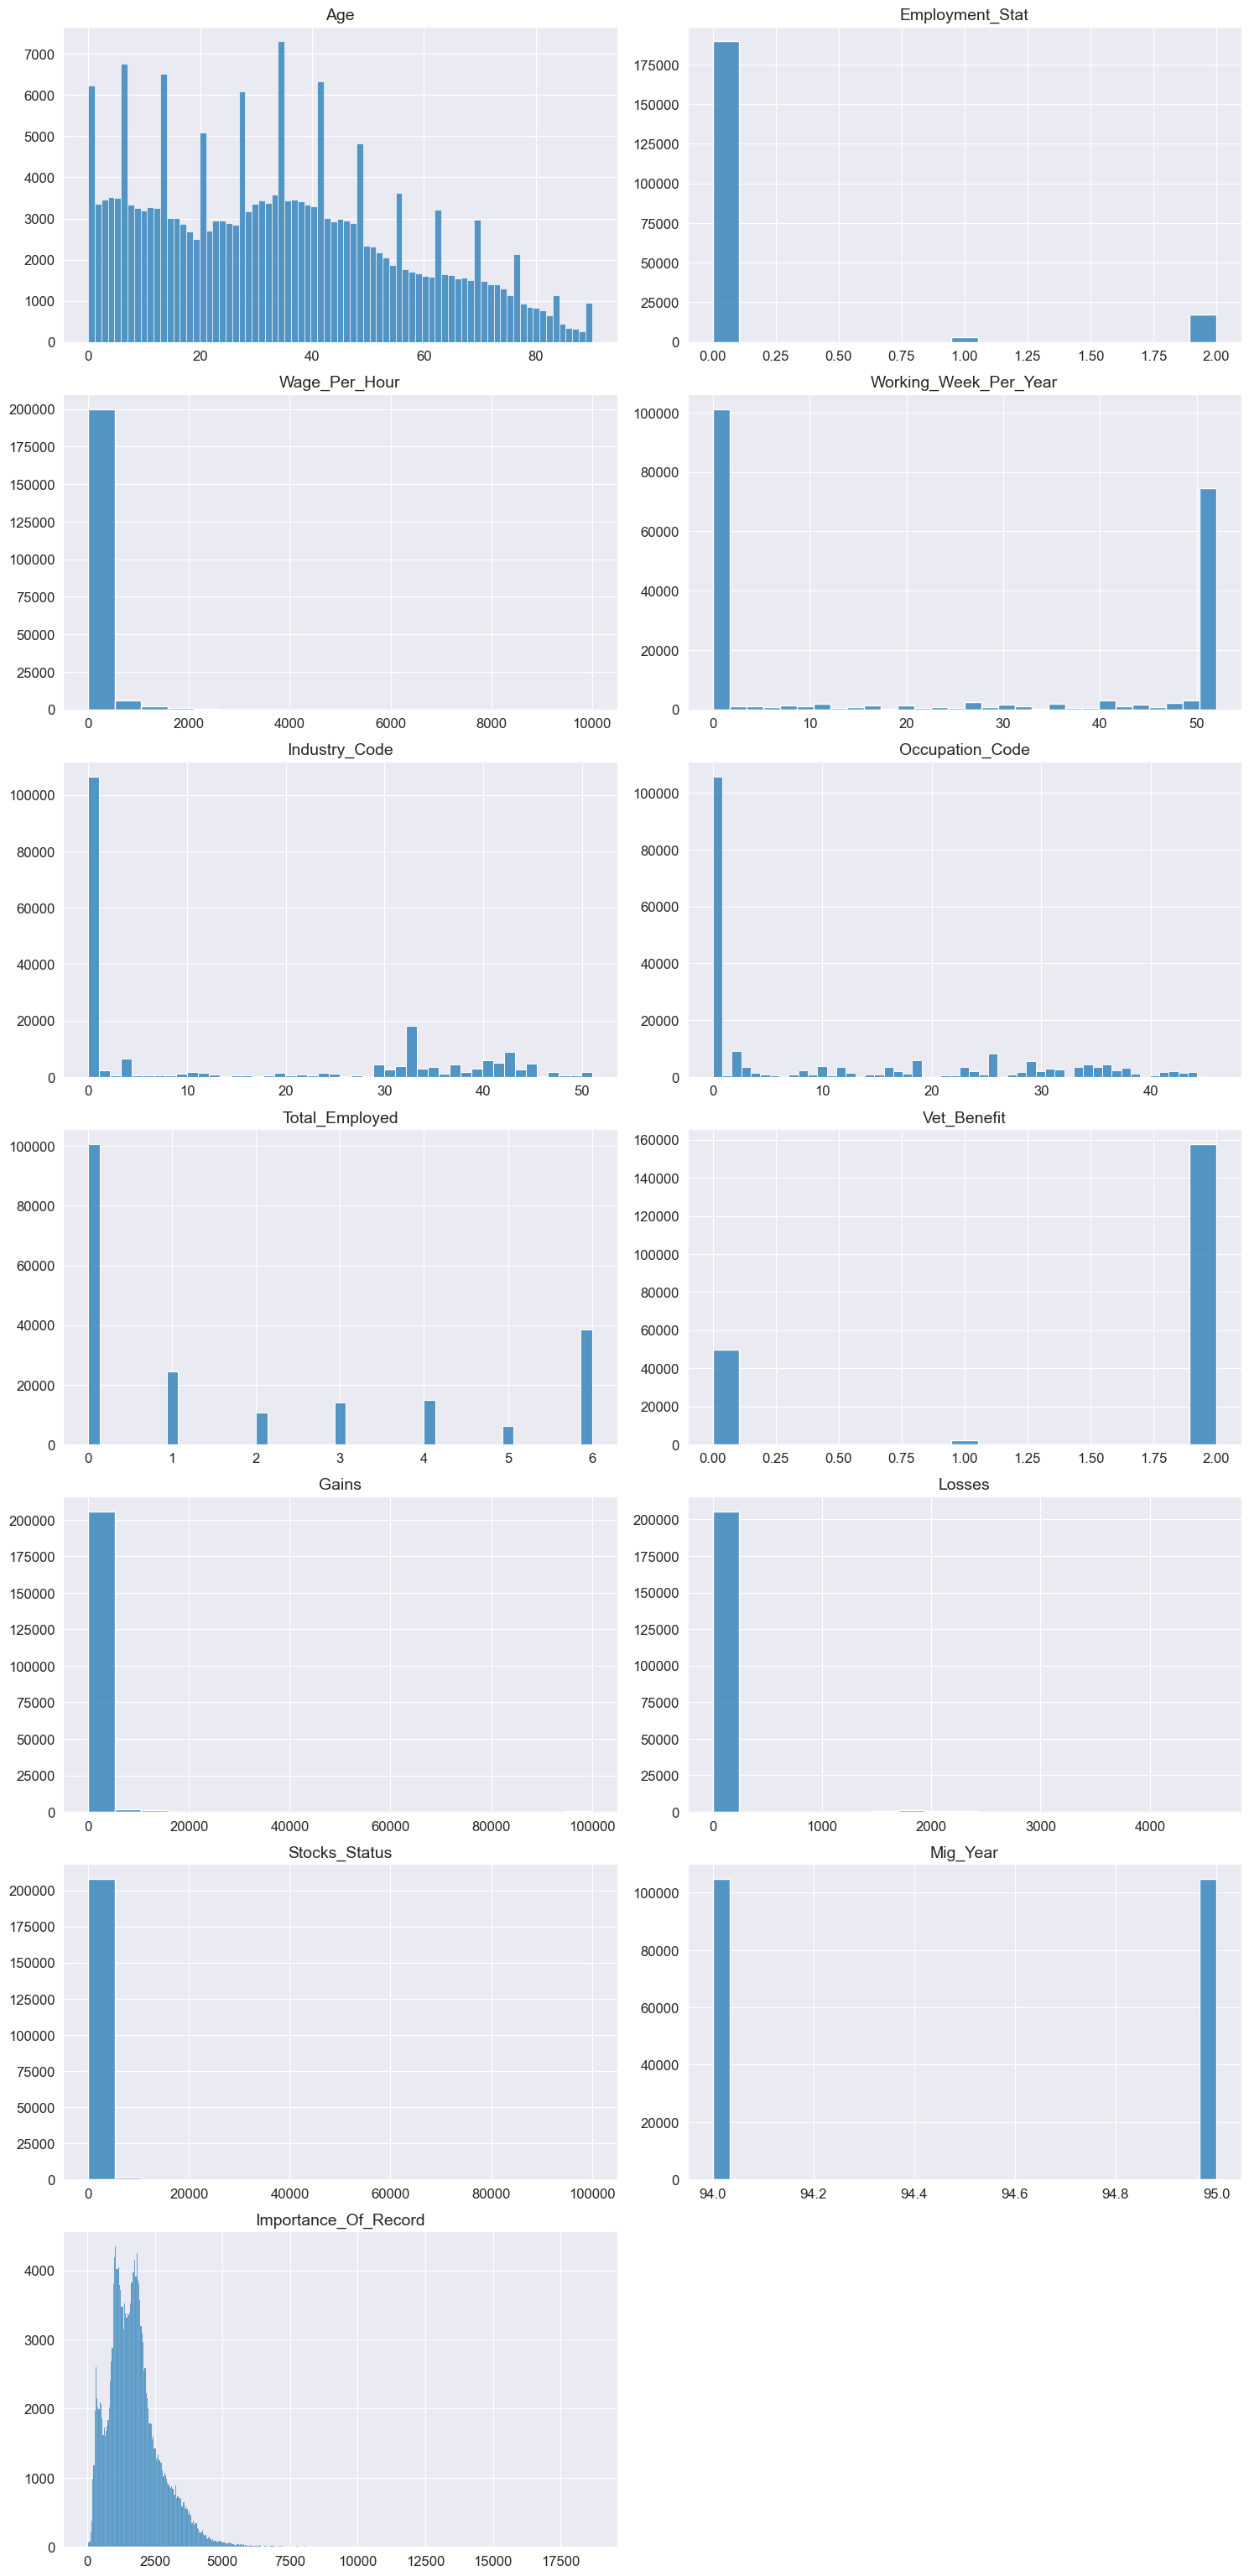

In [34]:
plt.figure(figsize=(15,70))
plotnumber = 1

for col in dfIncome[numerical_columns]:
    if plotnumber <= dfIncome.shape[1]:
        ax1 = plt.subplot(16,2,plotnumber)
        sns.histplot(data=dfIncome, x=col, palette='Dark2')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1
plt.tight_layout()

In [35]:
# Bivariate Analysis
def bivariate_analysis(data, variable1, variable2):
    # Scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(data[variable1], data[variable2])
    plt.title('Scatter plot between ' + variable1 + ' and ' + variable2)
    plt.xlabel(variable1)
    plt.ylabel(variable2)
    plt.show()

    # Line plot
    plt.figure(figsize=(8, 6))
    plt.plot(data[variable1], data[variable2])
    plt.title('Line plot between ' + variable1 + ' and ' + variable2)
    plt.xlabel(variable1)
    plt.ylabel(variable2)
    plt.show()

    # Correlation matrix heatmap
    correlation_matrix = data[[variable1, variable2]].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap between ' + variable1 + ' and ' + variable2)
    plt.show()

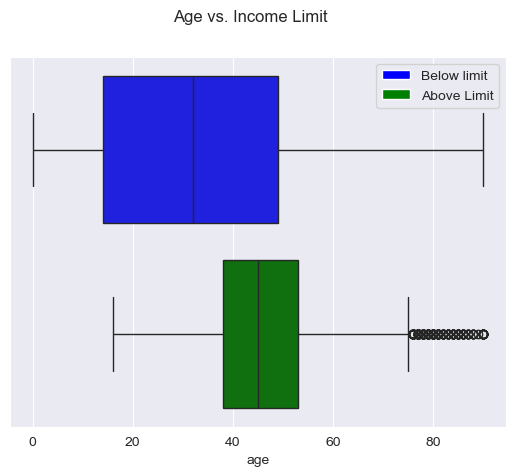

In [36]:
# Analysis of Target Variable (Income Limit) and Age
fig, ax = plt.subplots()

sns.boxplot(x="age", y="income_above_limit", data=dfIncome, orient="h", 
            palette={'Below limit':"blue", 'Above limit':"green"}, ax=ax)

ax.get_yaxis().set_visible(False)

fig.suptitle("Age vs. Income Limit")

color_patches = [
    Patch(facecolor="blue", label="Below limit"),
    Patch(facecolor="green", label="Above Limit")
]
ax.legend(handles=color_patches);

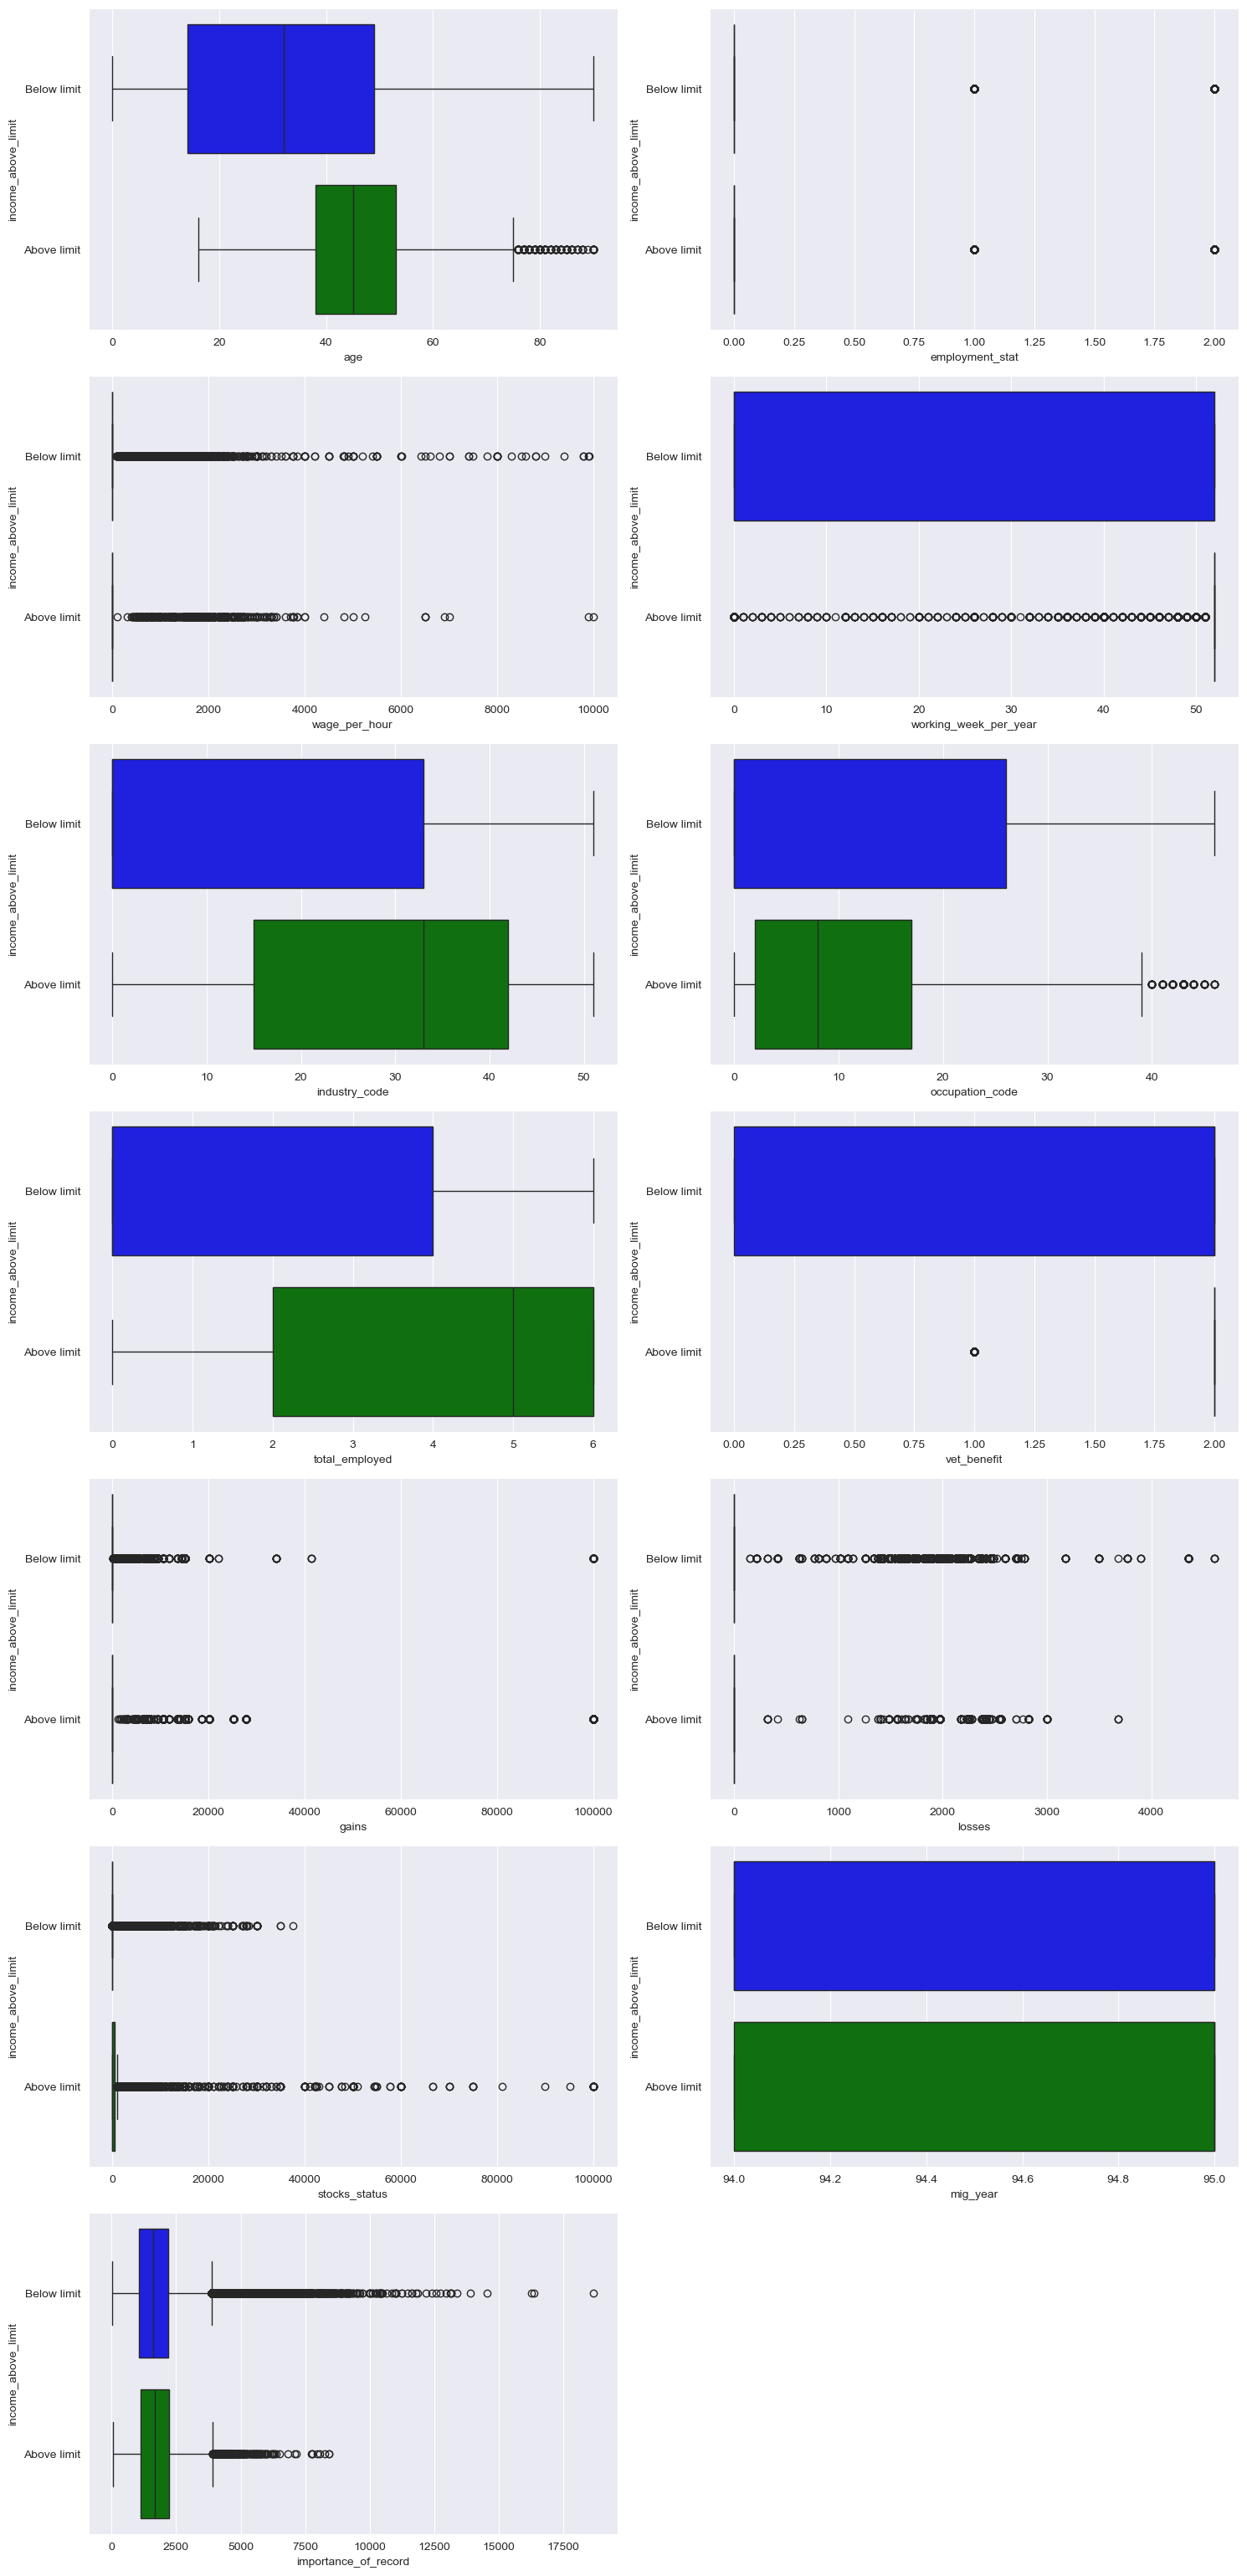

In [37]:
plt.figure(figsize=(15,70))
plotnumber = 1

for col in dfIncome[numerical_columns]:
    if plotnumber <= dfIncome.shape[1]:
        ax1 = plt.subplot(16,2,plotnumber)
        sns.boxplot(x=col, y="income_above_limit", data=dfIncome, orient="h", 
            palette={'Below limit':"blue", 'Above limit':"green"}, ax=ax1)

        ax.get_yaxis().set_visible(False)

        fig.suptitle(f"{col} vs. Income Limit")

        color_patches = [
            Patch(facecolor="blue", label="Below limit"),
            Patch(facecolor="green", label="Above Limit")
        ]
        ax.legend(handles=color_patches);
    plotnumber +=1
plt.tight_layout()

In [38]:
dfIncome['employment_stat'].unique()

array([0, 2, 1], dtype=int64)

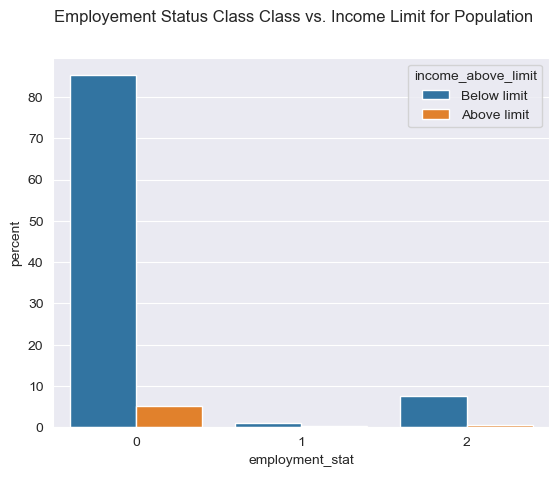

In [39]:
fig, ax = plt.subplots()

sns.countplot(dfIncome, x="employment_stat", hue="income_above_limit",stat="percent")

fig.suptitle("Employement Status Class Class vs. Income Limit for Population");

In [40]:
dfIncome['total_employed'].unique()

array([2, 0, 4, 6, 1, 3, 5], dtype=int64)

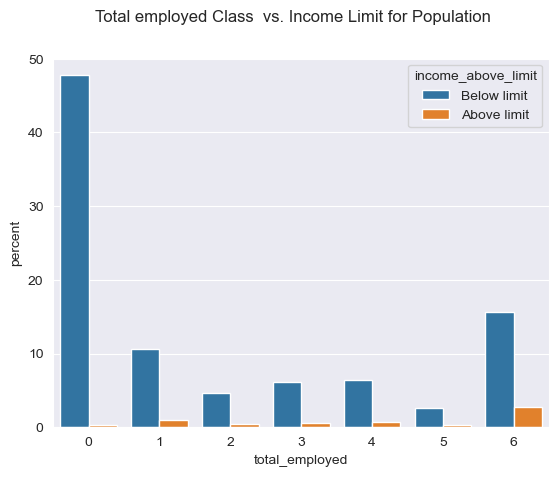

In [41]:
fig, ax = plt.subplots()

sns.countplot(dfIncome, x="total_employed", hue="income_above_limit",stat="percent")

fig.suptitle("Total employed Class  vs. Income Limit for Population");

In [42]:
dfIncome['vet_benefit'].unique()

array([2, 0, 1], dtype=int64)

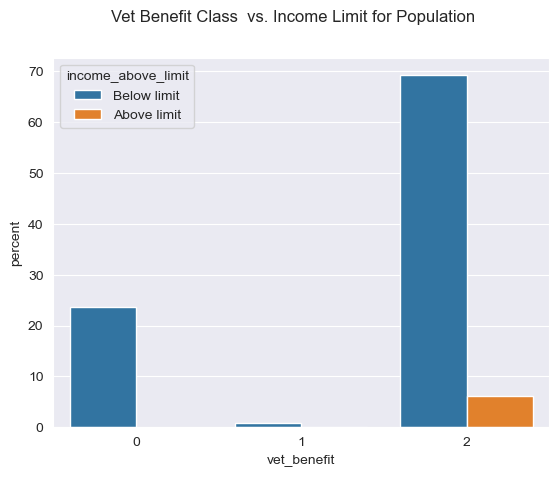

In [43]:
fig, ax = plt.subplots()

sns.countplot(dfIncome, x="vet_benefit", hue="income_above_limit",stat="percent")

fig.suptitle("Vet Benefit Class  vs. Income Limit for Population");

In [44]:
dfIncome['losses'].unique()

array([   0, 2001, 1977, 2002, 1408,  625, 1848, 2415, 1340, 1672, 1602,
       2206, 1902, 1740, 2339, 1411, 1887, 2258, 1741, 2559, 2444, 2704,
       1579, 1138, 1504, 3004, 2377, 1485, 1721, 1669, 3770,  880, 1668,
       2547, 2042, 2149,  419, 1974, 2057, 1628, 1092, 1590, 2051, 1980,
       2603, 1825,  323, 1876, 3500, 4356, 2267, 2163, 1719, 2179, 2824,
       1573, 1594, 1651, 1617,  213, 1258, 1648, 1436, 1844, 2027, 1421,
       2246, 1564, 2129, 1429, 1755, 2205, 2788, 1539, 2174, 3900, 2457,
       2489, 2392, 1816, 2090, 2754, 1735, 2231, 3175,  810, 2597, 2467,
       2282, 1944,  653, 1762, 1021, 2352, 1510, 1870, 2238, 1911, 2722,
       1380,  772, 3683,  974, 4608, 1726, 2201,  155, 2080, 1956, 2472,
       1640, 2465, 2519, 2769], dtype=int64)

<Axes: xlabel='losses', ylabel='Count'>

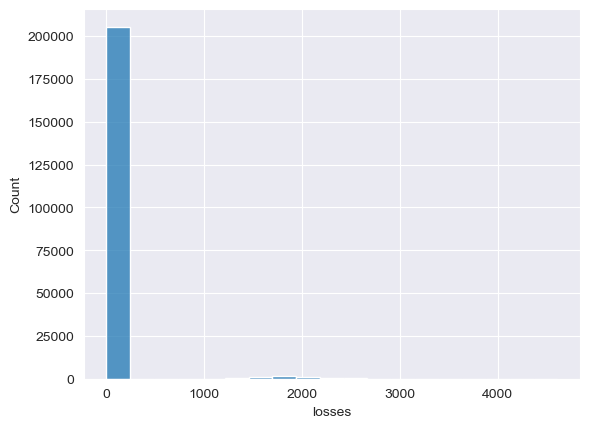

In [45]:
sns.histplot(data=dfIncome, x="losses")

In [46]:
dfIncome['wage_per_hour'].value_counts()

0       197643
500        777
600        585
700        572
800        512
         ...  
2226         1
3190         1
5250         1
3500         1
557          1
Name: wage_per_hour, Length: 1232, dtype: int64

<Axes: xlabel='wage_per_hour', ylabel='Count'>

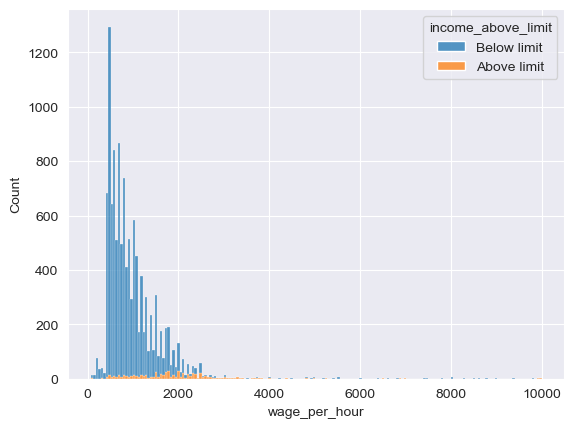

In [47]:
sns.histplot(data=dfIncome[dfIncome['wage_per_hour'] != 0] , x="wage_per_hour",hue="income_above_limit", multiple="stack")

In [48]:
list(dfIncome)

['age',
 'gender',
 'education',
 'marital_status',
 'race',
 'is_hispanic',
 'employment_commitment',
 'employment_stat',
 'wage_per_hour',
 'working_week_per_year',
 'industry_code',
 'industry_code_main',
 'occupation_code',
 'total_employed',
 'household_stat',
 'household_summary',
 'vet_benefit',
 'tax_status',
 'gains',
 'losses',
 'stocks_status',
 'citizenship',
 'mig_year',
 'country_of_birth_own',
 'country_of_birth_father',
 'country_of_birth_mother',
 'importance_of_record',
 'income_above_limit']

Country of birth own, father, mother are not some columns that may have any affect on model

In [51]:
dfIncome.drop(['country_of_birth_own','country_of_birth_father','country_of_birth_mother'],axis=1,inplace=True)

In [52]:
list(dfIncome)

['age',
 'gender',
 'education',
 'marital_status',
 'race',
 'is_hispanic',
 'employment_commitment',
 'employment_stat',
 'wage_per_hour',
 'working_week_per_year',
 'industry_code',
 'industry_code_main',
 'occupation_code',
 'total_employed',
 'household_stat',
 'household_summary',
 'vet_benefit',
 'tax_status',
 'gains',
 'losses',
 'stocks_status',
 'citizenship',
 'mig_year',
 'importance_of_record',
 'income_above_limit']

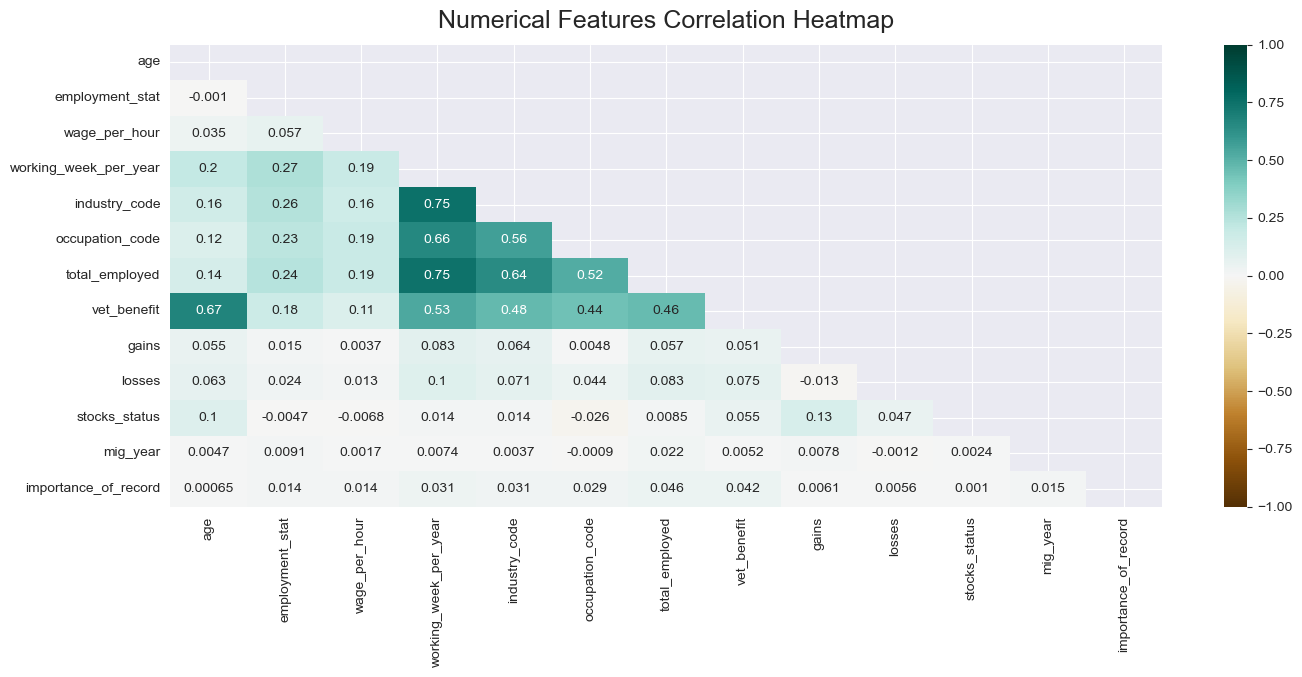

In [49]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(dfIncome.corr(), dtype=np.bool))
heatmap = sns.heatmap(dfIncome.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG', mask = mask)
heatmap.set_title('Numerical Features Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [50]:
for i in dfIncome.columns:
    if dfIncome[i].dtypes == 'object':
        print(f"Unique value in {i}:")
        print(dfIncome[i].unique(),'\n')

Unique value in gender:
[' Female' ' Male'] 

Unique value in education:
[' High school graduate' ' 12th grade no diploma' ' Children'
 ' Bachelors degree(BA AB BS)' ' 7th and 8th grade' ' 11th grade'
 ' 9th grade' ' Masters degree(MA MS MEng MEd MSW MBA)' ' 10th grade'
 ' Associates degree-academic program' ' 1st 2nd 3rd or 4th grade'
 ' Some college but no degree' ' Less than 1st grade'
 ' Associates degree-occup /vocational'
 ' Prof school degree (MD DDS DVM LLB JD)' ' 5th or 6th grade'
 ' Doctorate degree(PhD EdD)'] 

Unique value in marital_status:
[' Widowed' ' Never married' ' Married-civilian spouse present'
 ' Divorced' ' Married-spouse absent' ' Separated'
 ' Married-A F spouse present'] 

Unique value in race:
[' White' ' Black' ' Asian or Pacific Islander'
 ' Amer Indian Aleut or Eskimo' ' Other'] 

Unique value in is_hispanic:
[' All other' ' Mexican-American' ' Central or South American'
 ' Mexican (Mexicano)' ' Puerto Rican' ' Other Spanish' ' NA' ' Cuban'
 ' Do not know

# Chi Square for Correlation

In [53]:
cat_var1 = dfIncome.select_dtypes(include='object').columns

dfIncomeLE = dfIncome.copy(deep=True)
for column in cat_var1:
    le = preprocessing.LabelEncoder()
    le.fit(dfIncomeLE[column])
    dfIncomeLE[column] = le.transform(dfIncomeLE[column])
    labels = dict(zip(le.classes_, le.transform(le.classes_)))
    print(labels)

{' Female': 0, ' Male': 1}
{' 10th grade': 0, ' 11th grade': 1, ' 12th grade no diploma': 2, ' 1st 2nd 3rd or 4th grade': 3, ' 5th or 6th grade': 4, ' 7th and 8th grade': 5, ' 9th grade': 6, ' Associates degree-academic program': 7, ' Associates degree-occup /vocational': 8, ' Bachelors degree(BA AB BS)': 9, ' Children': 10, ' Doctorate degree(PhD EdD)': 11, ' High school graduate': 12, ' Less than 1st grade': 13, ' Masters degree(MA MS MEng MEd MSW MBA)': 14, ' Prof school degree (MD DDS DVM LLB JD)': 15, ' Some college but no degree': 16}
{' Divorced': 0, ' Married-A F spouse present': 1, ' Married-civilian spouse present': 2, ' Married-spouse absent': 3, ' Never married': 4, ' Separated': 5, ' Widowed': 6}
{' Amer Indian Aleut or Eskimo': 0, ' Asian or Pacific Islander': 1, ' Black': 2, ' Other': 3, ' White': 4}
{' All other': 0, ' Central or South American': 1, ' Chicano': 2, ' Cuban': 3, ' Do not know': 4, ' Mexican (Mexicano)': 5, ' Mexican-American': 6, ' NA': 7, ' Other Spanish

In [54]:
dfIncomeLE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   age                    209499 non-null  int64  
 1   gender                 209499 non-null  int32  
 2   education              209499 non-null  int32  
 3   marital_status         209499 non-null  int32  
 4   race                   209499 non-null  int32  
 5   is_hispanic            209499 non-null  int32  
 6   employment_commitment  209499 non-null  int32  
 7   employment_stat        209499 non-null  int64  
 8   wage_per_hour          209499 non-null  int64  
 9   working_week_per_year  209499 non-null  int64  
 10  industry_code          209499 non-null  int64  
 11  industry_code_main     209499 non-null  int32  
 12  occupation_code        209499 non-null  int64  
 13  total_employed         209499 non-null  int64  
 14  household_stat         209499 non-nu

In [55]:
## Creating all possible combinations between the above two variables list
cat_var2= dfIncomeLE.columns
from itertools import product
cat_var_prod = list(product(['income_above_limit'],cat_var2, repeat = 1))
cat_var_prod

[('income_above_limit', 'age'),
 ('income_above_limit', 'gender'),
 ('income_above_limit', 'education'),
 ('income_above_limit', 'marital_status'),
 ('income_above_limit', 'race'),
 ('income_above_limit', 'is_hispanic'),
 ('income_above_limit', 'employment_commitment'),
 ('income_above_limit', 'employment_stat'),
 ('income_above_limit', 'wage_per_hour'),
 ('income_above_limit', 'working_week_per_year'),
 ('income_above_limit', 'industry_code'),
 ('income_above_limit', 'industry_code_main'),
 ('income_above_limit', 'occupation_code'),
 ('income_above_limit', 'total_employed'),
 ('income_above_limit', 'household_stat'),
 ('income_above_limit', 'household_summary'),
 ('income_above_limit', 'vet_benefit'),
 ('income_above_limit', 'tax_status'),
 ('income_above_limit', 'gains'),
 ('income_above_limit', 'losses'),
 ('income_above_limit', 'stocks_status'),
 ('income_above_limit', 'citizenship'),
 ('income_above_limit', 'mig_year'),
 ('income_above_limit', 'importance_of_record'),
 ('income_ab

In [ ]:
# Set the float display option
pd.options.display.float_format = '{:.8f}'.format

In [56]:
import scipy.stats as ss
result = []
for i in cat_var_prod:
    if i[0] != i[1]:
        result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(dfIncomeLE[i[0]], dfIncomeLE[i[1]])))[1]))

In [57]:
chi_test_output = pd.DataFrame(result, columns = ['var1','var2','coeff'])
## Using pivot function to convert the above DataFrame into a crosstab
chi_test_output.where(chi_test_output['coeff'] <= 0.05).pivot_table(index='var1', columns='var2', values='coeff')
##chi_test_output.pivot_table(index='var1', columns='var2', values='coeff')

var2,age,citizenship,education,employment_commitment,employment_stat,gains,gender,household_stat,household_summary,industry_code,...,marital_status,mig_year,occupation_code,race,stocks_status,tax_status,total_employed,vet_benefit,wage_per_hour,working_week_per_year
var1,,,,,,,,,,,,,,,,,,,,,
income_above_limit,0.0,2.451779e-76,0.0,0.0,1.870276e-296,0.0,0.0,0.0,0.0,0.0,...,0.0,2.922374e-15,0.0,4.247191e-155,0.0,0.0,0.0,0.0,7.795881e-139,0.0


Income_Above_Limit has relationship with Citizen

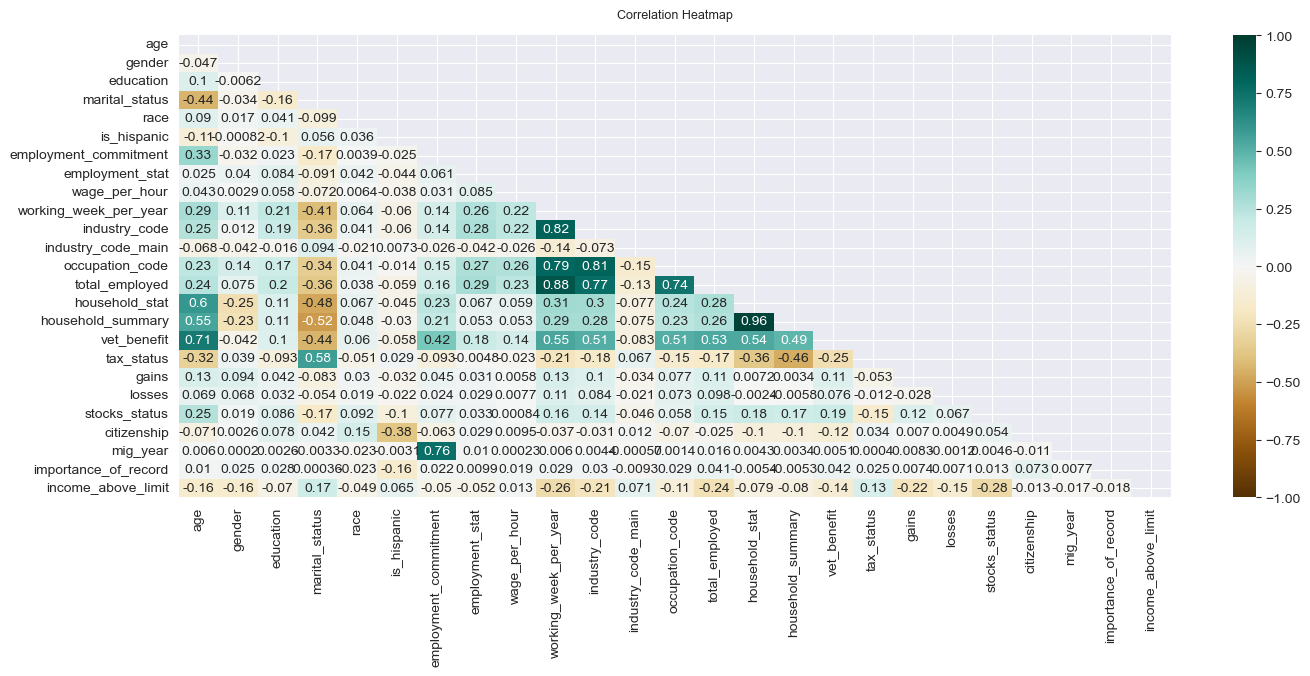

In [58]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(dfIncomeLE.corr(), dtype=np.bool))
heatmap = sns.heatmap(dfIncomeLE.corr('spearman'), vmin=-1, vmax=1, annot=True, cmap='BrBG', mask = mask)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':9}, pad=12);

In [59]:
dfIncome.drop(columns=['household_stat'],axis=1,inplace=True)

In [60]:
list(dfIncome)

['age',
 'gender',
 'education',
 'marital_status',
 'race',
 'is_hispanic',
 'employment_commitment',
 'employment_stat',
 'wage_per_hour',
 'working_week_per_year',
 'industry_code',
 'industry_code_main',
 'occupation_code',
 'total_employed',
 'household_summary',
 'vet_benefit',
 'tax_status',
 'gains',
 'losses',
 'stocks_status',
 'citizenship',
 'mig_year',
 'importance_of_record',
 'income_above_limit']

# <span style="font-family:cursive;text-align:center">Fixing imbalanced dataset using Oversampling</span> 

In [61]:
x,y = dfIncome.drop(['income_above_limit'],axis=1),dfIncome['income_above_limit']

In [62]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_random_resampled, Y_random_resampled = ros.fit_resample(x,y)

In [63]:
print('The class Imbalance in the data is given below')
print(Y_random_resampled.value_counts(),'\n')
print('The class imbalance in terms of percentage is given below ')
print(f"{Y_random_resampled.value_counts(normalize=True)*100}")

The class Imbalance in the data is given below
Below limit    196501
Above limit    196501
Name: income_above_limit, dtype: int64 

The class imbalance in terms of percentage is given below 
Below limit    50.0
Above limit    50.0
Name: income_above_limit, dtype: float64


###  <span style="font-family:cursive;text-align:center">Creating a train test split</span>

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X_random_resampled, Y_random_resampled, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (314401, 23)
X_test shape: (78601, 23)
Y_train shape: (314401,)
Y_test shape: (78601,)


In [66]:
X_train.reset_index(drop=True,inplace=True)
X_train.head()

,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,...,total_employed,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,importance_of_record
0,32,Male,High school graduate,Divorced,White,All other,Children or Armed Forces,0,0,52,...,1,Householder,2,Head of household,0,0,0,Native,94,1207.45
1,74,Female,High school graduate,Married-civilian spouse present,White,All other,Children or Armed Forces,0,0,0,...,0,Spouse of householder,2,Nonfiler,0,0,0,Native,94,2242.96
2,43,Male,Associates degree-academic program,Never married,White,All other,Unemployed part- time,0,0,52,...,6,Householder,2,Single,0,0,0,Native,95,3371.85
3,43,Male,Some college but no degree,Never married,White,All other,Full-time schedules,0,0,52,...,6,Householder,2,Single,0,0,125,Native,95,1315.73
4,22,Female,Some college but no degree,Never married,White,Other Spanish,Not in labor force,0,0,0,...,0,Child 18 or older,2,Nonfiler,0,0,0,Native,95,691.33


In [67]:
X_test.reset_index(drop=True,inplace=True)
X_test.head()

,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,...,total_employed,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,importance_of_record
0,28,Male,High school graduate,Married-civilian spouse present,White,Puerto Rican,Children or Armed Forces,0,0,52,...,2,Householder,2,Joint both under 65,0,0,0,Native,94,905.79
1,21,Male,High school graduate,Never married,White,All other,Full-time schedules,0,800,45,...,6,Householder,2,Single,27828,0,0,Native,95,1299.69
2,43,Female,Some college but no degree,Married-civilian spouse present,White,All other,Full-time schedules,0,0,52,...,6,Spouse of householder,2,Joint both under 65,0,0,0,Native,95,3852.26
3,40,Female,11th grade,Widowed,White,Central or South American,Children or Armed Forces,0,650,52,...,3,Householder,2,Head of household,0,0,0,Native,94,1081.40
4,6,Male,Children,Never married,White,All other,Children or Armed Forces,0,0,0,...,0,Child under 18 never married,0,Nonfiler,0,0,0,Native,95,3522.25


<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;"> 
Encoding:

In [69]:
from sklearn.preprocessing import OneHotEncoder

columns_to_encode = ['gender','education','marital_status','race','is_hispanic','employment_commitment','industry_code_main',
                     'household_summary','tax_status','citizenship']

columns_to_keep = X_train.drop(columns_to_encode,axis=1).columns

encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')

encoded_columns = encoder.fit_transform(X_train[columns_to_encode])

encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))

X_train_encoded = pd.concat([encoded_df, X_train[columns_to_keep]], axis=1)

In [70]:
X_train_encoded.head()

,gender_ Female,gender_ Male,education_ 10th grade,education_ 11th grade,education_ 12th grade no diploma,education_ 1st 2nd 3rd or 4th grade,education_ 5th or 6th grade,education_ 7th and 8th grade,education_ 9th grade,education_ Associates degree-academic program,...,working_week_per_year,industry_code,occupation_code,total_employed,vet_benefit,gains,losses,stocks_status,mig_year,importance_of_record
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52,49,33,1,2,0,0,0,94,1207.45
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,2,0,0,0,94,2242.96
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,52,29,15,6,2,0,0,0,95,3371.85
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52,30,14,6,2,0,0,125,95,1315.73
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,2,0,0,0,95,691.33


In [71]:
X_train_encoded.shape

(314401, 105)

In [72]:
encoded_columns = encoder.transform(X_test[columns_to_encode])

encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))

X_test_encoded = pd.concat([encoded_df, X_test[columns_to_keep]], axis=1)

X_test_encoded.head()

,gender_ Female,gender_ Male,education_ 10th grade,education_ 11th grade,education_ 12th grade no diploma,education_ 1st 2nd 3rd or 4th grade,education_ 5th or 6th grade,education_ 7th and 8th grade,education_ 9th grade,education_ Associates degree-academic program,...,working_week_per_year,industry_code,occupation_code,total_employed,vet_benefit,gains,losses,stocks_status,mig_year,importance_of_record
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52,4,34,2,2,0,0,0,94,905.79
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,45,4,39,6,2,27828,0,0,95,1299.69
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52,29,38,6,2,0,0,0,95,3852.26
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52,33,26,3,2,0,0,0,94,1081.40
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,95,3522.25


In [73]:
X_test_encoded.shape

(78601, 105)

In [74]:
Y_train.replace({'Below limit':0,'Above limit':1},inplace=True)
Y_test.replace({'Below limit':0,'Above limit':1},inplace=True)

RFC: 0.982319 (0.000172)
XGBC: 0.909374 (0.000772)


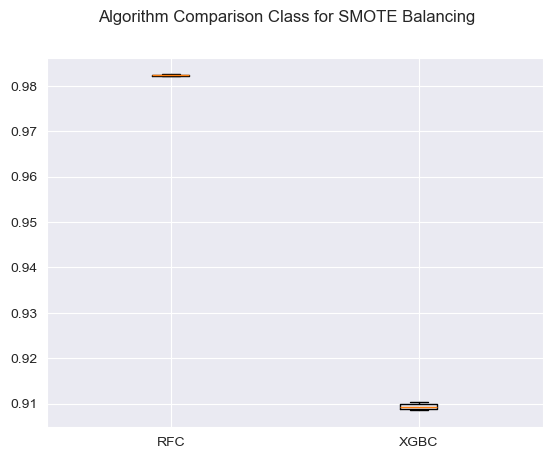

In [82]:
models, names, legend = list(), list(), list()

models.append(RandomForestClassifier())
names.append('RFC')

models.append(XGBClassifier())
names.append('XGBC')


legend = []
results = []
for j in range(len(models)):
    kfold = KFold(n_splits=3)
    cv_results = cross_val_score(models[j], X_train_encoded, Y_train, cv=kfold, scoring='f1_micro')
    results.append(cv_results)
    legend.append(names[j])
    msg = "%s: %f (%f)" % ((names[j]), cv_results.mean(), cv_results.std())
    print(msg)
    
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison Class')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(legend)
plt.show()

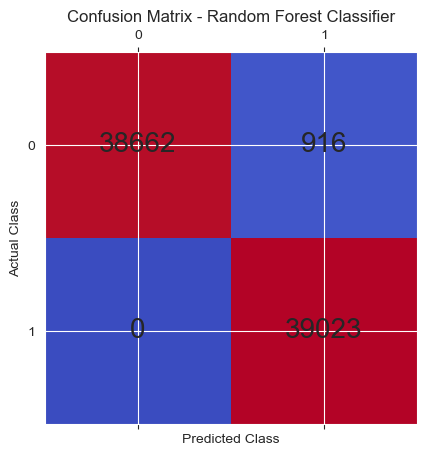

In [87]:
# Create Model and Save it
# Create an ExtraTreesClassifier instance
models, names, legend = list(), list(), list()
modelEXC = RandomForestClassifier()

modelEXC.fit(X_train_encoded, Y_train)
y_pred = modelEXC.predict(X_test_encoded)
#y_pred_prob = modelEXC.predict_proba(X_test)[:,1]
    
# Confusion matrix
conf_matrix = confusion_matrix(Y_test,y_pred)
plt.matshow(conf_matrix,cmap="coolwarm")

plt.title("Confusion Matrix - Random Forest Classifier")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")

for (i,j),corr_value in np.ndenumerate(conf_matrix):
    plt.text(j,i,corr_value,ha="center",va="center",fontsize = 20)
plt.show()

In [88]:
#classification_report
dfS = pd.DataFrame(classification_report(Y_test, y_pred, labels=[0,1], 
                                   target_names=["Below limit","Above limit", "Slight Injury"],output_dict=True)).transpose()
dfS

,precision,recall,f1-score,support
Below limit,1.000000,0.976856,0.988292,39578.000000
Above limit,0.977065,1.000000,0.988399,39023.000000
accuracy,0.988346,0.988346,0.988346,0.988346
macro avg,0.988533,0.988428,0.988346,78601.000000
weighted avg,0.988613,0.988346,0.988346,78601.000000
